In [2]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 87.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 84.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 87.7 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=a89218ffb67164a74ac958500703c1ad4d170aeddf6a83bd9fbb5a4da21addf0
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [3]:
from sentence_transformers import SentenceTransformer

In [112]:
model = SentenceTransformer('all-MiniLM-L6-v2')

In [25]:
sentences = ['I am happy','I am super happy', 'This is a dog',"This is a dinosaur"]
sentence_embeddings = model.encode(sentences)

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA(n_components=2)
pca.fit(sentence_embeddings)

PCA(n_components=2)

In [28]:
transformed = pca.transform(sentence_embeddings)

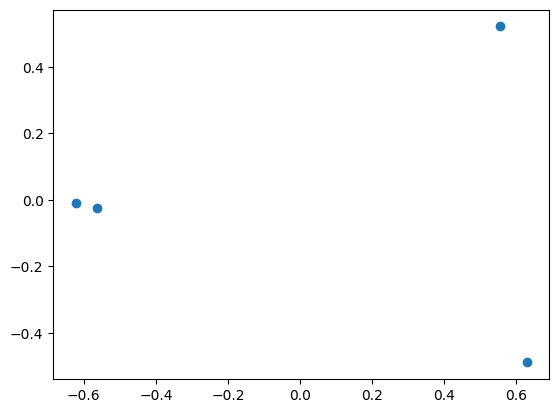

In [29]:
import matplotlib.pyplot as plt
plt.scatter(transformed[:,0], transformed[:,1])

## SMS - Spam Classification

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv("spam.csv", encoding="latin")

In [37]:
df = df[['v1','v2']]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [38]:
Y = df[['v1']]
X = df[['v2']]

In [56]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y = le.fit_transform(Y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [39]:
X

,v2
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will Ì_ b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


In [49]:
X_vals = X.values.flatten()
X_encoded = model.encode(X_vals)

In [51]:
pca_text = PCA(n_components=2)
pca_text.fit(X_encoded)

PCA(n_components=2)

In [54]:
X_transformed = pca_text.transform(X_encoded)

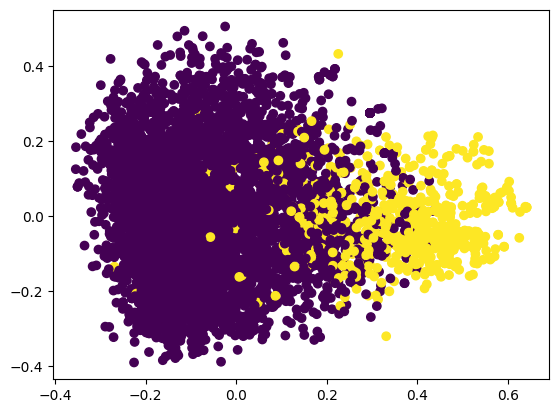

In [58]:
plt.scatter(X_transformed[:,0], X_transformed[:,1], c=Y)

### Train Test Split

In [67]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_encoded, Y, stratify=Y)

### Modelling

In [63]:
# models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# metrics
from sklearn.metrics import classification_report

In [96]:
def fit_model(model_inst, X, Y, test_x, test_y):
  model = model_inst.fit(X, Y)
  print(classification_report(model.predict(test_x), test_y))

In [97]:
# logistic regression

fit_model(LogisticRegression(), x_train, y_train, x_test, y_test)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1225
           1       0.88      0.98      0.93       168

    accuracy                           0.98      1393
   macro avg       0.94      0.98      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [98]:
# Support vector machines

fit_model(SVC(), x_train, y_train, x_test, y_test)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1220
           1       0.93      1.00      0.96       173

    accuracy                           0.99      1393
   macro avg       0.96      0.99      0.98      1393
weighted avg       0.99      0.99      0.99      1393



In [99]:
fit_model(DecisionTreeClassifier(), x_train, y_train, x_test, y_test)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1196
           1       0.73      0.70      0.71       197

    accuracy                           0.92      1393
   macro avg       0.84      0.83      0.83      1393
weighted avg       0.92      0.92      0.92      1393



In [100]:
fit_model(RandomForestClassifier(), x_train, y_train, x_test, y_test)

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1265
           1       0.68      1.00      0.81       128

    accuracy                           0.96      1393
   macro avg       0.84      0.98      0.89      1393
weighted avg       0.97      0.96      0.96      1393



## Experimenting with TFIDF

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [89]:
tfidf_vec = TfidfVectorizer()
x_tfidf = tfidf_vec.fit_transform(X_vals)

In [91]:
x_tfidf.shape

(5572, 8672)

In [90]:
x_train_tf, x_test_tf, y_train_tf, y_test_tf = train_test_split(x_tfidf, Y, stratify=Y)

In [101]:
fit_model(LogisticRegression(), x_train_tf, y_train_tf, x_test_tf, y_test_tf)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1261
           1       0.70      0.99      0.82       132

    accuracy                           0.96      1393
   macro avg       0.85      0.97      0.90      1393
weighted avg       0.97      0.96      0.96      1393



In [102]:
fit_model(SVC(), x_train_tf, y_train_tf, x_test_tf, y_test_tf)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1235
           1       0.84      0.99      0.91       158

    accuracy                           0.98      1393
   macro avg       0.92      0.98      0.95      1393
weighted avg       0.98      0.98      0.98      1393



In [103]:
fit_model(DecisionTreeClassifier(), x_train_tf, y_train_tf, x_test_tf, y_test_tf)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1214
           1       0.87      0.91      0.89       179

    accuracy                           0.97      1393
   macro avg       0.93      0.94      0.93      1393
weighted avg       0.97      0.97      0.97      1393



In [104]:
fit_model(RandomForestClassifier(), x_train_tf, y_train_tf, x_test_tf, y_test_tf)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1243
           1       0.80      1.00      0.89       150

    accuracy                           0.97      1393
   macro avg       0.90      0.99      0.94      1393
weighted avg       0.98      0.97      0.97      1393



SVM with sentence_transformer performed a lot better

### Export models

In [105]:
import pickle

In [114]:
svc = SVC()

# fit_model(SVC(), x_train, y_train, x_test, y_test)
svc.fit(x_train, y_train)

SVC()

In [115]:
svc.score(x_train, y_train)

0.9968892079444843

In [116]:
svc.score(x_test, y_test)

0.9899497487437185

In [110]:
pickle.dump(model, open("svc_spam_classifier.pickle","wb"))

In [122]:
embdedings = model.encode("Free $5000 Million dollars.. Grab the offer now")

In [124]:
svc.predict([embdedings])[0]

1